<a href="https://colab.research.google.com/github/GregSym/Numberphile_Follow_Alongs/blob/spoon/NumberphileFollowAlongs_HitomezashiPatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numberphile Follow-Alongs

So I'm immediately breaking my rule that the videos must issue some sort of challenge because I thought the patterns looked cool - and if I must defend myself the visualisation is a bit of a challenge in and of itself

# Hitomezashi Stitch Patterns
## Dec 6, 2021
https://www.youtube.com/watch?v=JbfhzlMk2eY

## Before we go anywhere, getting from input arrays to a visualisation of the pattern:

In [39]:
from __future__ import annotations

class HitomezashiRepr:
  def __init__(self, side_one: list[int], side_two: list[int], *args, **kwargs):
    self.side_one = side_one
    self.side_two = side_two
  
  def _vector_grid_general(self, index_side: list[int], magnitude_side: list[int]) -> dict[int, list[tuple[int, int]]]:
    """ generator property that yields vectors left to right in the hitomezashi pattern  """
    vector_map: dict[int, list[tuple[int, int]]] = {}
    for index, bit in enumerate(index_side):
      vector_map[index] = []
      for index_value_pair, index_value_pair1 in zip(enumerate(magnitude_side), list(enumerate(magnitude_side))[1:]):
        if bit == 1:
          if index_value_pair[0]%2 == 0 and index_value_pair1[0]%2 == 1:
            vector_map[index].append((index_value_pair[0], index_value_pair1[0]))
        else:
          if index_value_pair[0]%2 == 1 and index_value_pair1[0]%2 == 0:
            vector_map[index].append((index_value_pair[0], index_value_pair1[0]))
    return vector_map
  
  @property
  def vector_grid_ltr(self) -> dict[int, list[tuple[int, int]]]:
    return self._vector_grid_general(index_side=self.side_one, magnitude_side=self.side_two)
  @property
  def vector_grid_btt(self) -> dict[int, list[tuple[int, int]]]:
    return self._vector_grid_general(index_side=self.side_two, magnitude_side=self.side_one)
  
  def _line_segments_general(self, 
                        grid_single_direction: dict[int, list[tuple[int, int]]]
                        ) -> dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]]:  # typealias this maybe?
    return {index:{
        internal_index:
                vector
                 for internal_index, vector in enumerate(list_tuple)
                } for (index, list_tuple) in grid_single_direction.items()}

  @property
  def line_segments_ltr(self) -> dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]]:  # typealias this maybe?
    return self._line_segments_general(grid_single_direction=self.vector_grid_ltr)
  @property
  def line_segments_btt(self) -> dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]]:  # typealias this maybe?
    return self._line_segments_general(grid_single_direction=self.vector_grid_btt)
  

In [40]:
import matplotlib.pyplot as plt

In [73]:
import numpy as np

def visualise_hitomezashi_pattern(pattern: HitomezashiRepr, verbose: bool = False):
  def _plotting(line_segments: dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]], direction: str = 'ltr'):
    for key, vector_dict in line_segments.items():
      for vector in vector_dict.values():
        plt.gca().add_line(
            plt.Line2D(xdata=vector, ydata=(key, key), linewidth=2.5)
            ) if direction == 'ltr' else plt.gca().add_line(
                plt.Line2D(xdata=(key, key), ydata=vector, linewidth=2.5))

  if verbose:
    print(pattern.vector_grid_ltr)
    print(pattern.vector_grid_btt)
    print(pattern.line_segments_ltr)
    print(pattern.line_segments_btt)
  plt.axes()
  _plotting(pattern.line_segments_ltr)
  _plotting(pattern.line_segments_btt, direction='btt')
  plt.axis('scaled')
  plt.show()  

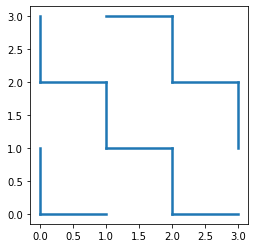

In [74]:
side_1: list[int] = [1, 0, 1, 0]
side_2: list[int] = [1, 0, 1, 0]

visualise_hitomezashi_pattern(pattern=HitomezashiRepr(side_one=side_1, side_two=side_2))

## Plotting random sequences

The next step is to scale up to plot a large random sequence

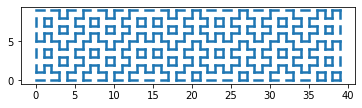

In [75]:
import random

side_one = [random.randint(0, 1) for _ in range(10)]
side_two = [random.randint(0, 1) for _ in range(40)]

visualise_hitomezashi_pattern(pattern=HitomezashiRepr(side_one=side_one, side_two=side_two))

It's probably useful to wrap this up and allow any combination of side length as a parameter

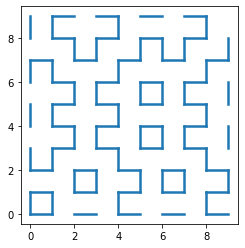

In [76]:
def visualise_for_given_side_length(xlength: int = 10, ylength: int = 10):
  side_one = [random.randint(0, 1) for _ in range(ylength)]
  side_two = [random.randint(0, 1) for _ in range(xlength)]

  visualise_hitomezashi_pattern(pattern=HitomezashiRepr(side_one=side_one, side_two=side_two))

visualise_for_given_side_length()